IMPORTING LIBRARIES

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mat73
from tensorflow import keras
from tensorflow.keras import layers

LOADING DATA

In [32]:
data_dict = {        'data':('data (1).mat','data (2).mat','data (3).mat','data (4).mat','data (5).mat','data (6).mat','data (7).mat','data (19).mat','data (9).mat','data (10).mat','data (11).mat','data (22).mat','data (12).mat','data (13).mat','data (14).mat','data (15).mat','data (16).mat','data (17).mat','data (18).mat')

    }
P= data_dict.get('data')

SEPERATING HSI BANDS

In [33]:
band1,band2,band3,band4,band5,band6,band7=[],[],[],[],[],[],[]


In [34]:
for i in P:
    file=mat73.loadmat(i)['rad']
    file=np.rot90(file, k=1, axes=(0, 1))
    bt1,bt2,bt3,bt4,bt5,bt6,bt7=[],[],[],[],[],[],[]
    for j in range(64):
        b1,b2,b3,b4,b5,b6,b7=[],[],[],[],[],[],[]
        for k in range(64):
            b1.append([file[j][k][0]])
            b2.append([file[j][k][6]])
            b3.append([file[j][k][10]])
            b4.append([file[j][k][15]])
            b5.append([file[j][k][20]])
            b6.append([file[j][k][25]])
            b7.append([file[j][k][30]])

        bt1.append(b1)
        bt2.append(b2)
        bt3.append(b3)
        bt4.append(b4)
        bt5.append(b5)
        bt6.append(b6)
        bt7.append(b7)

    band1.append(bt1)
    band2.append(bt2)
    band3.append(bt3)
    band4.append(bt4)
    band5.append(bt5)
    band6.append(bt6)
    band7.append(bt7)

    

band1 =np.expand_dims(np.array(band1),axis=1)
band2 =np.expand_dims(np.array(band2),axis=1)
band3 =np.expand_dims(np.array(band3),axis=1)
band4 =np.expand_dims(np.array(band4),axis=1)
band5 =np.expand_dims(np.array(band5),axis=1)
band6 =np.expand_dims(np.array(band6),axis=1)
band7 =np.expand_dims(np.array(band7),axis=1)


In [35]:
band3.shape

(19, 1, 64, 64, 1)

LOADING RGB IMAGES

In [37]:
rgb=[]
for i in P:
    file=mat73.loadmat(i)['rgb']
    rgb1=[]
    for j in range(64):
        rgb2=[]
        for k in range(64):
            rgb2.append([file[j][k][0],file[j][k][1],file[j][k][2]])
        
        rgb1.append(rgb2)
    rgb.append(rgb1)

rgb=np.array(rgb)
rgb=np.expand_dims(rgb,axis=1)

TEST DATA

In [14]:
test=mat73.loadmat('data (8).mat')['rgb']
print(test.shape)
test_rgb=[]
for i in range(500):
    test1=[]
    for j in range(500):
        test1.append([test[i][j][0],test[i][j][1],test[i][j][2]])
    
    test_rgb.append(test1)

test_rgb=np.array(test_rgb)
test_rgb.shape  

(1392, 1306, 3)


(500, 500, 3)

In [8]:
test_rad=mat73.loadmat('data (8).mat')['rad']
test_rad= np.rot90(test_rad, k=1, axes=(0, 1))

print(test_rad.shape)
test_band1=[]
for i in range(500):
    test1=[]
    for j in range(500):
        test1.append([test_rad[i][j][0]])
    
    test_band1.append(test1)

test_band1=np.array(test_band1)
test_band1.shape  


(1392, 1300, 31)


(500, 500, 1)

TRAIN DATA

In [38]:
# print(x.shape, y.shape)
train=rgb
# valid=l_rad

INCRESASING DIMENSIONS TO MATCH WITH NETWORK

In [39]:
print(train.shape)
print(band1.shape,band3.shape)

(19, 1, 64, 64, 3)
(19, 1, 64, 64, 1) (19, 1, 64, 64, 1)


In [40]:
import tensorflow as tf
# from math import log10, sqrt
from keras import backend as K
import torch
def PSNR(y_true, y_pred):
    max_pixel = 700.0
    return (10.0 * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - y_true), axis=-1)))) / 2.303


def my_metric_fn(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

def SSIMLoss(y_true, y_pred):
  return 1-tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

BAND 1

In [ ]:
bpnet = keras.Sequential()
bpnet.add(layers.Conv3D(64,(3,5,5), activation='relu', input_shape=(1,64,64,3), padding='same',use_bias=True))
bpnet.add(layers.Conv3D(32, 3,activation='relu',  padding='same', use_bias=True))
bpnet.add(layers.Conv3D(32,(3,3,5), activation='relu', padding='same',use_bias=True))
bpnet.add(layers.Conv3D(32, (3,3,1), activation='relu', padding='same', use_bias=True))
bpnet.add(layers.Conv3D(16, (3,3,3), activation='relu', padding='same', use_bias=True))
bpnet.add(layers.Conv3D(16, 1, activation='relu', padding='same', use_bias=True))
bpnet.add(layers.Conv3D(1, 1,activation='relu',  padding='same', use_bias=True))

bpnet.compile(optimizer='adam', loss='mse', metrics=[PSNR])

h1=bpnet.fit(train,y=band1,epochs=2000)
bpnet.save('band1.h5')


Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 106600.3984 - PSNR: 7.3529
Epoch 2/2000
1/1 [==============================] - 2s 2s/step - loss: 106588.2344 - PSNR: 7.3534
Epoch 3/2000
1/1 [==============================] - 2s 2s/step - loss: 106557.9141 - PSNR: 7.3545
Epoch 4/2000
1/1 [==============================] - 2s 2s/step - loss: 106499.0859 - PSNR: 7.3568
Epoch 5/2000
1/1 [==============================] - 2s 2s/step - loss: 106383.4844 - PSNR: 7.3610
Epoch 6/2000
1/1 [==============================] - 2s 2s/step - loss: 106168.7500 - PSNR: 7.3689
Epoch 7/2000
1/1 [==============================] - 2s 2s/step - loss: 105794.3281 - PSNR: 7.3827
Epoch 8/2000
1/1 [==============================] - 2s 2s/step - loss: 105174.6094 - PSNR: 7.4054
Epoch 9/2000
1/1 [==============================] - 2s 2s/step - loss: 104194.4531 - PSNR: 7.4417
Epoch 10/2000
1/1 [==============================] - 2s 2s/step - loss: 102683.6484 - PSNR: 7.4984
Epoch 11/2000
1/1 [

BAND 7

In [74]:
bpnet2 = keras.Sequential()
bpnet2.add(layers.Conv3D(64,(3,5,5), activation='relu', input_shape=(1,64,64,3), padding='same',use_bias=True))
bpnet2.add(layers.Conv3D(32, (3,5,5),activation='relu',  padding='same', use_bias=True))
bpnet2.add(layers.Conv3D(32, 3, activation='relu', padding='same',use_bias=True))
bpnet2.add(layers.Conv3D(32, 3, activation='relu', padding='same', use_bias=True))
bpnet2.add(layers.Conv3D(16, (3,3,1), activation='relu', padding='same', use_bias=True))
bpnet2.add(layers.Conv3D(16, 1, activation='relu', padding='same', use_bias=True))
bpnet2.add(layers.Conv3D(1, 1,activation='relu',  padding='same', use_bias=True))


bpnet2.compile(optimizer='adam', loss='mse', metrics=[PSNR])

h2=bpnet2.fit(train,y=band2,epochs=2000)
bpnet2.save('band7_2.h5')

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 906351.0625 - PSNR: 0.1493
Epoch 2/2000
1/1 [==============================] - 2s 2s/step - loss: 906261.2500 - PSNR: 0.1498
Epoch 3/2000
1/1 [==============================] - 2s 2s/step - loss: 906078.1875 - PSNR: 0.1507
Epoch 4/2000
1/1 [==============================] - 2s 2s/step - loss: 905696.3125 - PSNR: 0.1526
Epoch 5/2000
1/1 [==============================] - 2s 2s/step - loss: 904937.5625 - PSNR: 0.1563
Epoch 6/2000
1/1 [==============================] - 2s 2s/step - loss: 903576.5000 - PSNR: 0.1629
Epoch 7/2000
1/1 [==============================] - 2s 2s/step - loss: 901252.6250 - PSNR: 0.1742
Epoch 8/2000
1/1 [==============================] - 2s 2s/step - loss: 897488.0000 - PSNR: 0.1925
Epoch 9/2000
1/1 [==============================] - 2s 2s/step - loss: 891561.6875 - PSNR: 0.2213
Epoch 10/2000
1/1 [==============================] - 2s 2s/step - loss: 882523.3125 - PSNR: 0.2657
Epoch 11/2000
1/1 [

KeyboardInterrupt: 

BAND 11

In [42]:

bpnet3 = keras.Sequential()
bpnet3.add(layers.Conv3D(64,(3,5,5), activation='relu', input_shape=(1,64,64,3), padding='same',use_bias=True))
bpnet3.add(layers.Conv3D(32, 3,activation='relu',  padding='same', use_bias=True))
bpnet3.add(layers.Conv3D(32,(3,3,5), activation='relu', padding='same',use_bias=True))
bpnet3.add(layers.Conv3D(32, (3,3,1), activation='relu', padding='same', use_bias=True))
bpnet3.add(layers.Conv3D(16, (3,3,3), activation='relu', padding='same', use_bias=True))
bpnet3.add(layers.Conv3D(16, 1, activation='relu', padding='same', use_bias=True))
bpnet3.add(layers.Conv3D(1, 1,activation='relu',  padding='same', use_bias=True))

bpnet3.compile(optimizer='adam', loss='mse', metrics=[PSNR])

h3=bpnet3.fit(train,y=band3,epochs=2000)
bpnet3.save('band11.h5')

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 1139214.5000 - PSNR: -0.4992
Epoch 2/2000
1/1 [==============================] - 2s 2s/step - loss: 1139203.6250 - PSNR: -0.4992
Epoch 3/2000
1/1 [==============================] - 2s 2s/step - loss: 1139182.1250 - PSNR: -0.4991
Epoch 4/2000
1/1 [==============================] - 2s 2s/step - loss: 1139141.8750 - PSNR: -0.4989
Epoch 5/2000
1/1 [==============================] - 2s 2s/step - loss: 1139072.6250 - PSNR: -0.4986
Epoch 6/2000
1/1 [==============================] - 2s 2s/step - loss: 1138949.6250 - PSNR: -0.4981
Epoch 7/2000
1/1 [==============================] - 2s 2s/step - loss: 1138741.6250 - PSNR: -0.4972
Epoch 8/2000
1/1 [==============================] - 2s 2s/step - loss: 1138400.7500 - PSNR: -0.4959
Epoch 9/2000
1/1 [==============================] - 2s 2s/step - loss: 1137862.1250 - PSNR: -0.4937
Epoch 10/2000
1/1 [==============================] - 2s 2s/step - loss: 1137040.8750 - PSNR: -0.4905

BAND 16

In [73]:
bpnet4 = keras.Sequential()
bpnet4.add(layers.Conv3D(64,(3,5,5), activation='relu', input_shape=(1,64,64,3), padding='same',use_bias=True))
bpnet4.add(layers.Conv3D(32, 3,activation='relu',  padding='same', use_bias=True))
bpnet4.add(layers.Conv3D(32, 3,activation='relu',  padding='same', use_bias=True))
bpnet4.add(layers.Conv3D(32,(3,3,5), activation='relu', padding='same',use_bias=True))
bpnet4.add(layers.Conv3D(32, (3,3,1), activation='relu', padding='same', use_bias=True))
bpnet4.add(layers.Conv3D(16, (3,3,3), activation='relu', padding='same', use_bias=True))
bpnet4.add(layers.Conv3D(16, 1, activation='relu', padding='same', use_bias=True))
bpnet4.add(layers.Conv3D(1, 1,activation='relu',  padding='same', use_bias=True))

bpnet4.compile(optimizer='adam', loss='mse', metrics=[PSNR])

h4=bpnet4.fit(train,y=band4,epochs=2000)
bpnet4.save('band16.h5')

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 1111371.6250 - PSNR: -0.2878
Epoch 2/2000
1/1 [==============================] - 2s 2s/step - loss: 1111358.0000 - PSNR: -0.2878
Epoch 3/2000
1/1 [==============================] - 2s 2s/step - loss: 1111329.1250 - PSNR: -0.2876
Epoch 4/2000
1/1 [==============================] - 2s 2s/step - loss: 1111274.3750 - PSNR: -0.2873
Epoch 5/2000
1/1 [==============================] - 2s 2s/step - loss: 1111155.7500 - PSNR: -0.2868
Epoch 6/2000
1/1 [==============================] - 2s 2s/step - loss: 1110913.2500 - PSNR: -0.2858
Epoch 7/2000
1/1 [==============================] - 2s 2s/step - loss: 1110443.1250 - PSNR: -0.2839
Epoch 8/2000
1/1 [==============================] - 2s 2s/step - loss: 1109568.6250 - PSNR: -0.2803
Epoch 9/2000
1/1 [==============================] - 2s 2s/step - loss: 1108012.0000 - PSNR: -0.2740
Epoch 10/2000
1/1 [==============================] - 2s 2s/step - loss: 1105361.1250 - PSNR: -0.2633

BAND 21

In [122]:
bpnet5 = keras.Sequential()
bpnet5.add(layers.Conv3D(64,(3,5,5), activation='relu', input_shape=(1,64,64,3), padding='same',use_bias=True))
bpnet5.add(layers.Conv3D(32, 3,activation='relu',  padding='same', use_bias=True))
bpnet5.add(layers.Conv3D(32,(3,3,3), activation='relu', padding='same',use_bias=True))
bpnet5.add(layers.Conv3D(32, (3,3,1), activation='relu', padding='same', use_bias=True))
bpnet5.add(layers.Conv3D(16, (3,3,3), activation='relu', padding='same', use_bias=True))
bpnet5.add(layers.Conv3D(16, 3, activation='relu', padding='same', use_bias=True))
bpnet5.add(layers.Conv3D(1, 1,activation='relu',  padding='same', use_bias=True))
bpnet5.compile(optimizer='adam', loss='mse', metrics=[PSNR])

h5=bpnet5.fit(train,y=band5,epochs=2500)
bpnet5.save('band21.h5')

Epoch 1/2000
1/1 [==============================] - 4s 4s/step - loss: 1284833.0000 - PSNR: -0.4830
Epoch 2/2000
1/1 [==============================] - 2s 2s/step - loss: 1284803.5000 - PSNR: -0.4828
Epoch 3/2000
1/1 [==============================] - 2s 2s/step - loss: 1284750.2500 - PSNR: -0.4826
Epoch 4/2000
1/1 [==============================] - 2s 2s/step - loss: 1284644.5000 - PSNR: -0.4822
Epoch 5/2000
1/1 [==============================] - 2s 2s/step - loss: 1284444.7500 - PSNR: -0.4814
Epoch 6/2000
1/1 [==============================] - 2s 2s/step - loss: 1284078.3750 - PSNR: -0.4800
Epoch 7/2000
1/1 [==============================] - 2s 2s/step - loss: 1283431.6250 - PSNR: -0.4775
Epoch 8/2000
1/1 [==============================] - 2s 2s/step - loss: 1282310.3750 - PSNR: -0.4733
Epoch 9/2000
1/1 [==============================] - 2s 2s/step - loss: 1280440.3750 - PSNR: -0.4664
Epoch 10/2000
1/1 [==============================] - 2s 2s/step - loss: 1277435.3750 - PSNR: -0.4553

KeyboardInterrupt: 

BAND 26

In [72]:
bpnet6 = keras.Sequential()
bpnet6.add(layers.Conv3D(64,(3,5,5), activation='relu', input_shape=(1,64,64,3), padding='same',use_bias=True))
bpnet6.add(layers.Conv3D(32, 3,activation='relu',  padding='same', use_bias=True))
bpnet6.add(layers.Conv3D(32,(3,3,3), activation='relu', padding='same',use_bias=True))
bpnet6.add(layers.Conv3D(32, (3,3,1), activation='relu', padding='same', use_bias=True))
bpnet6.add(layers.Conv3D(16, (3,3,3), activation='relu', padding='same', use_bias=True))
bpnet6.add(layers.Conv3D(16, 1, activation='relu', padding='same', use_bias=True))
bpnet6.add(layers.Conv3D(1, 1,activation='relu',  padding='same', use_bias=True))

bpnet6.compile(optimizer='adam', loss='mse', metrics=[PSNR])

h6=bpnet6.fit(train,y=band6,epochs=2500)
bpnet6.save('band26.h5')

Epoch 1/2500
1/1 [==============================] - 2s 2s/step - loss: 1326289.5000 - PSNR: -0.1592
Epoch 2/2500
1/1 [==============================] - 1s 1s/step - loss: 1326269.0000 - PSNR: -0.1590
Epoch 3/2500
1/1 [==============================] - 1s 1s/step - loss: 1326236.0000 - PSNR: -0.1589
Epoch 4/2500
1/1 [==============================] - 1s 1s/step - loss: 1326173.2500 - PSNR: -0.1586
Epoch 5/2500
1/1 [==============================] - 1s 1s/step - loss: 1326061.8750 - PSNR: -0.1581
Epoch 6/2500
1/1 [==============================] - 1s 1s/step - loss: 1325878.6250 - PSNR: -0.1574
Epoch 7/2500
1/1 [==============================] - 1s 1s/step - loss: 1325581.6250 - PSNR: -0.1562
Epoch 8/2500
1/1 [==============================] - 1s 1s/step - loss: 1325118.7500 - PSNR: -0.1544
Epoch 9/2500
1/1 [==============================] - 1s 1s/step - loss: 1324405.2500 - PSNR: -0.1516
Epoch 10/2500
1/1 [==============================] - 1s 1s/step - loss: 1323334.3750 - PSNR: -0.1474

BAND 31

In [46]:
bpnet7 = keras.Sequential()
bpnet7.add(layers.Conv3D(64,(3,5,5), activation='relu', input_shape=(1,64,64,3), padding='same',use_bias=True))
bpnet7.add(layers.Conv3D(32, 3,activation='relu',  padding='same', use_bias=True))
bpnet7.add(layers.Conv3D(32,(3,3,3), activation='relu', padding='same',use_bias=True))
bpnet7.add(layers.Conv3D(32,(3,3,3), activation='relu', padding='same',use_bias=True))
bpnet7.add(layers.Conv3D(32, (3,3,1), activation='relu', padding='same', use_bias=True))
bpnet7.add(layers.Conv3D(16, (3,3,3), activation='relu', padding='same', use_bias=True))
bpnet7.add(layers.Conv3D(16, 1, activation='relu', padding='same', use_bias=True))
bpnet7.add(layers.Conv3D(1, 1,activation='relu',  padding='same', use_bias=True))

bpnet7.compile(optimizer='adam', loss='mse', metrics=[PSNR])

h7=bpnet7.fit(train,y=band7,epochs=2000)
bpnet7.save('band31.h5')

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 993351.0625 - PSNR: 0.9510
Epoch 2/2000
1/1 [==============================] - 2s 2s/step - loss: 993342.1250 - PSNR: 0.9511
Epoch 3/2000
1/1 [==============================] - 2s 2s/step - loss: 993328.6250 - PSNR: 0.9512
Epoch 4/2000
1/1 [==============================] - 2s 2s/step - loss: 993307.5000 - PSNR: 0.9514
Epoch 5/2000
1/1 [==============================] - 2s 2s/step - loss: 993270.3125 - PSNR: 0.9516
Epoch 6/2000
1/1 [==============================] - 2s 2s/step - loss: 993205.8750 - PSNR: 0.9520
Epoch 7/2000
1/1 [==============================] - 2s 2s/step - loss: 993090.9375 - PSNR: 0.9527
Epoch 8/2000
1/1 [==============================] - 2s 2s/step - loss: 992882.3125 - PSNR: 0.9539
Epoch 9/2000
1/1 [==============================] - 2s 2s/step - loss: 992514.7500 - PSNR: 0.9559
Epoch 10/2000
1/1 [==============================] - 2s 2s/step - loss: 991883.5000 - PSNR: 0.9592
Epoch 11/2000
1/1 [

In [111]:
test=mat73.loadmat('data (8).mat')['rgb']
print(test.shape)
test_rgb=[]
for i in range(64):
    test1=[]
    for j in range(64):
        test1.append([test[i][j][0],test[i][j][1],test[i][j][2]])
    
    test_rgb.append(test1)

test_rgb=np.array(test_rgb)
test_rgb.shape  

(1392, 1306, 3)


(64, 64, 3)

In [112]:
t=np.expand_dims(np.expand_dims(test_rgb,axis=0),axis=0)
# t*=500
t.shape

(1, 1, 64, 64, 3)

In [124]:
b1= keras.models.load_model('batch4/band1.h5',custom_objects={"PSNR": PSNR})
b2= keras.models.load_model('batch4/band7.h5',custom_objects={"PSNR": PSNR})
b3= keras.models.load_model('batch4/band11.h5',custom_objects={"PSNR": PSNR})
b4= keras.models.load_model('batch4/band16.h5',custom_objects={"PSNR": PSNR})
b5= keras.models.load_model('batch3/band21.h5',custom_objects={"PSNR": PSNR})
b6= keras.models.load_model('batch4/band26.h5',custom_objects={"PSNR": PSNR})
b7= keras.models.load_model('batch4/band31.h5',custom_objects={"PSNR": PSNR})

In [125]:
y1=b1.predict(t)
y2=b2.predict(t)
y3=b3.predict(t)
y4=b4.predict(t)
y5=b5.predict(t)
y6=b6.predict(t)
y7=b7.predict(t)

1/1 [==============================] - 0s 98ms/step


In [126]:
y1=np.squeeze(np.squeeze(y1, axis=0), axis=0)
y2=np.squeeze(np.squeeze(y2, axis=0), axis=0)
y3=np.squeeze(np.squeeze(y3, axis=0), axis=0)
y4=np.squeeze(np.squeeze(y4, axis=0), axis=0)
y5=np.squeeze(np.squeeze(y5, axis=0), axis=0)
y6=np.squeeze(np.squeeze(y6, axis=0), axis=0)
y7=np.squeeze(np.squeeze(y7, axis=0), axis=0)

In [127]:
b1,b2,b3,b4,b5,b6,b7=[],[],[],[],[],[],[]
b1.append(y1[:, :, 0])
b2.append(y2[:, :, 0])
b3.append(y3[:, :, 0])
b4.append(y4[:, :, 0])
b5.append(y5[:, :, 0])
b6.append(y6[:, :, 0])
b7.append(y7[:, :, 0])

In [128]:
test_band_1=[]
test_band_2=[]
test_band_3=[]
test_band_4=[]
test_band_5=[]
test_band_6=[]
test_band_7=[]

test_band_1.append(test_band('data (8).mat',0)[:,:,0])
test_band_2.append(test_band('data (8).mat',6)[:,:,0])
test_band_3.append(test_band('data (8).mat',10)[:,:,0])
test_band_4.append(test_band('data (8).mat',15)[:,:,0])
test_band_5.append(test_band('data (8).mat',20)[:,:,0])
test_band_6.append(test_band('data (8).mat',25)[:,:,0])
test_band_7.append(test_band('data (8).mat',30)[:,:,0])

(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)


In [129]:
test_rgb_check=[]
test_rgb_check.append(test_rgb[:,:,0])
test_rgb_check

[array([[0.76696165, 0.72861357, 0.76106195, ..., 0.81120944, 0.80530973,
         0.7979351 ],
        [0.74926254, 0.75516224, 0.73893805, ..., 0.7979351 , 0.83480826,
         0.77581121],
        [0.75811209, 0.75958702, 0.76106195, ..., 0.78908555, 0.82743363,
         0.77876106],
        ...,
        [0.86578171, 0.86283186, 0.84660767, ..., 0.82448378, 0.83923304,
         0.84513274],
        [0.85693215, 0.86283186, 0.8539823 , ..., 0.83923304, 0.8539823 ,
         0.82448378],
        [0.83775811, 0.87758112, 0.85103245, ..., 0.80678466, 0.82448378,
         0.82890855]])]

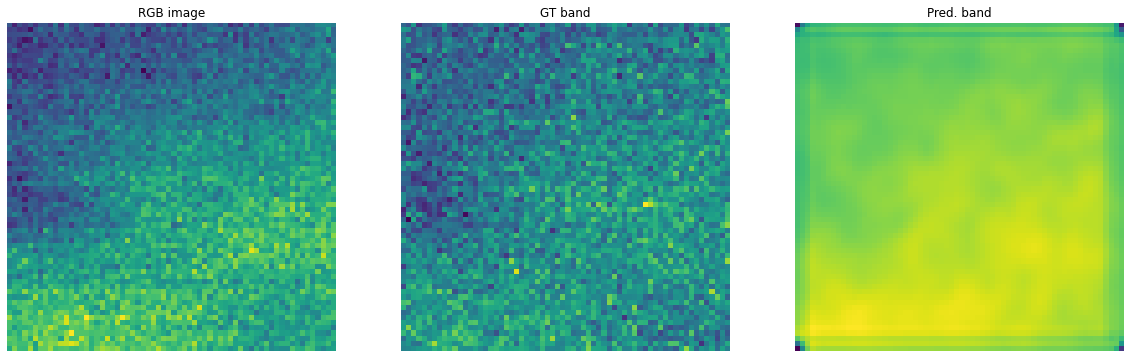

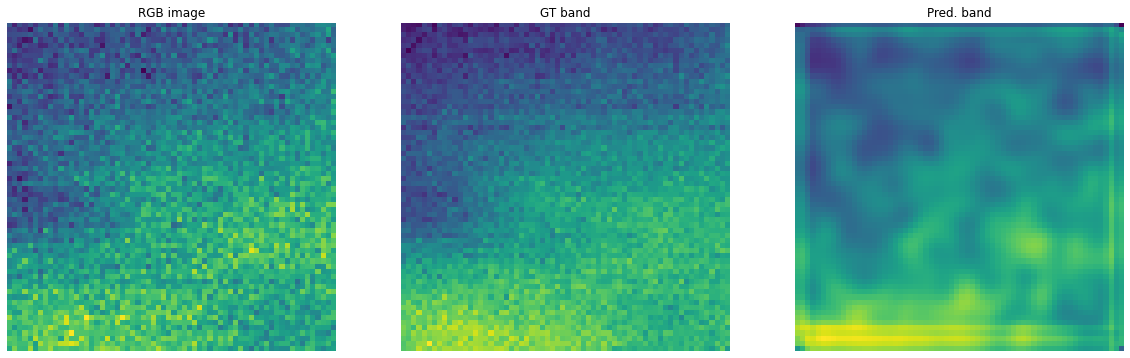

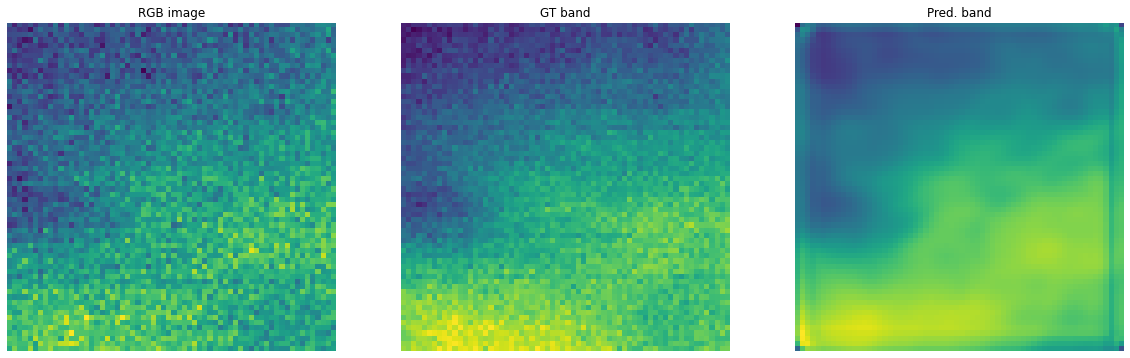

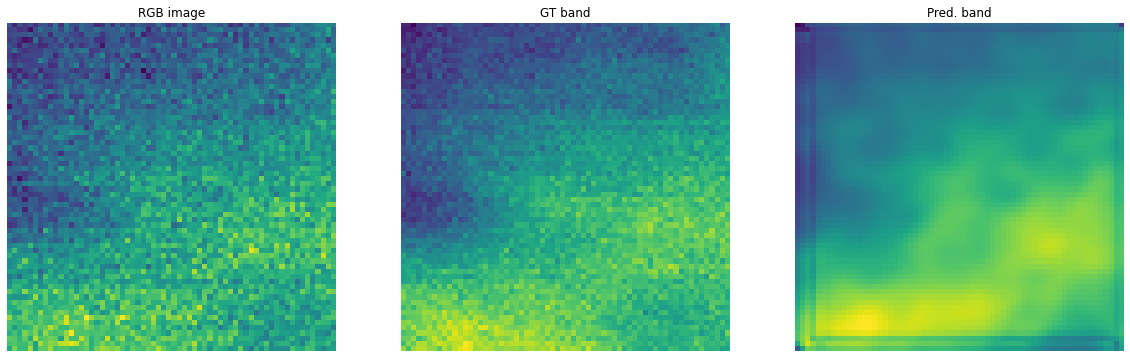

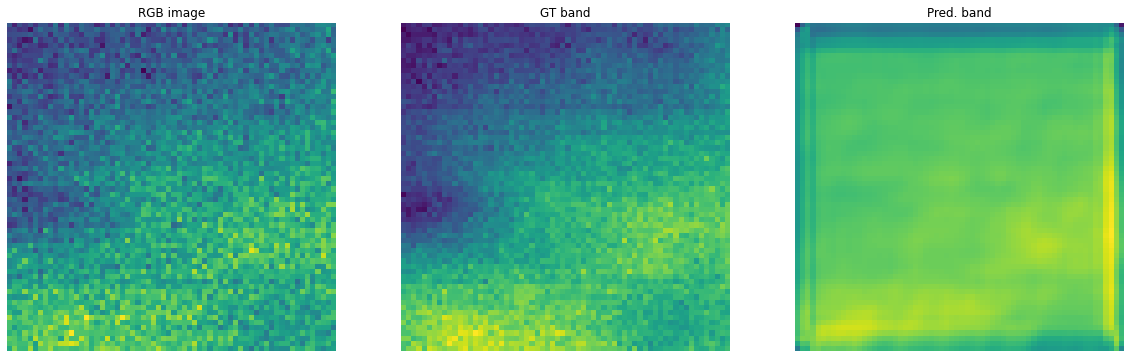

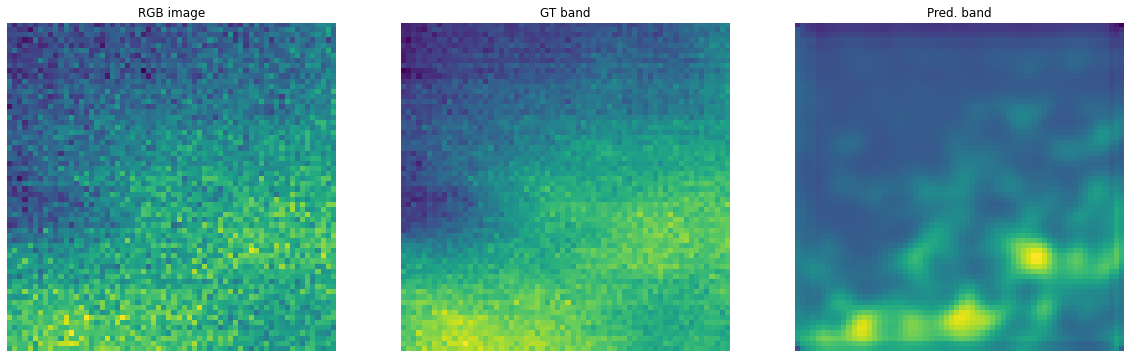

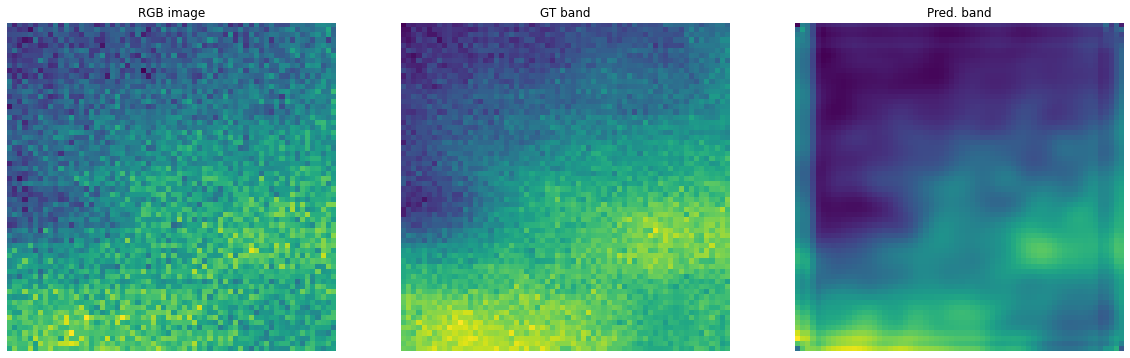

In [130]:
plot_results(test_rgb_check, test_band_1, b1,0)
plot_results(test_rgb_check, test_band_2, b2,0)
plot_results(test_rgb_check, test_band_3, b3,0)
plot_results(test_rgb_check, test_band_4, b4,0)
plot_results(test_rgb_check, test_band_5, b5,0)
plot_results(test_rgb_check, test_band_6, b6,0)
plot_results(test_rgb_check, test_band_7, b7,0)

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

BATCH 2

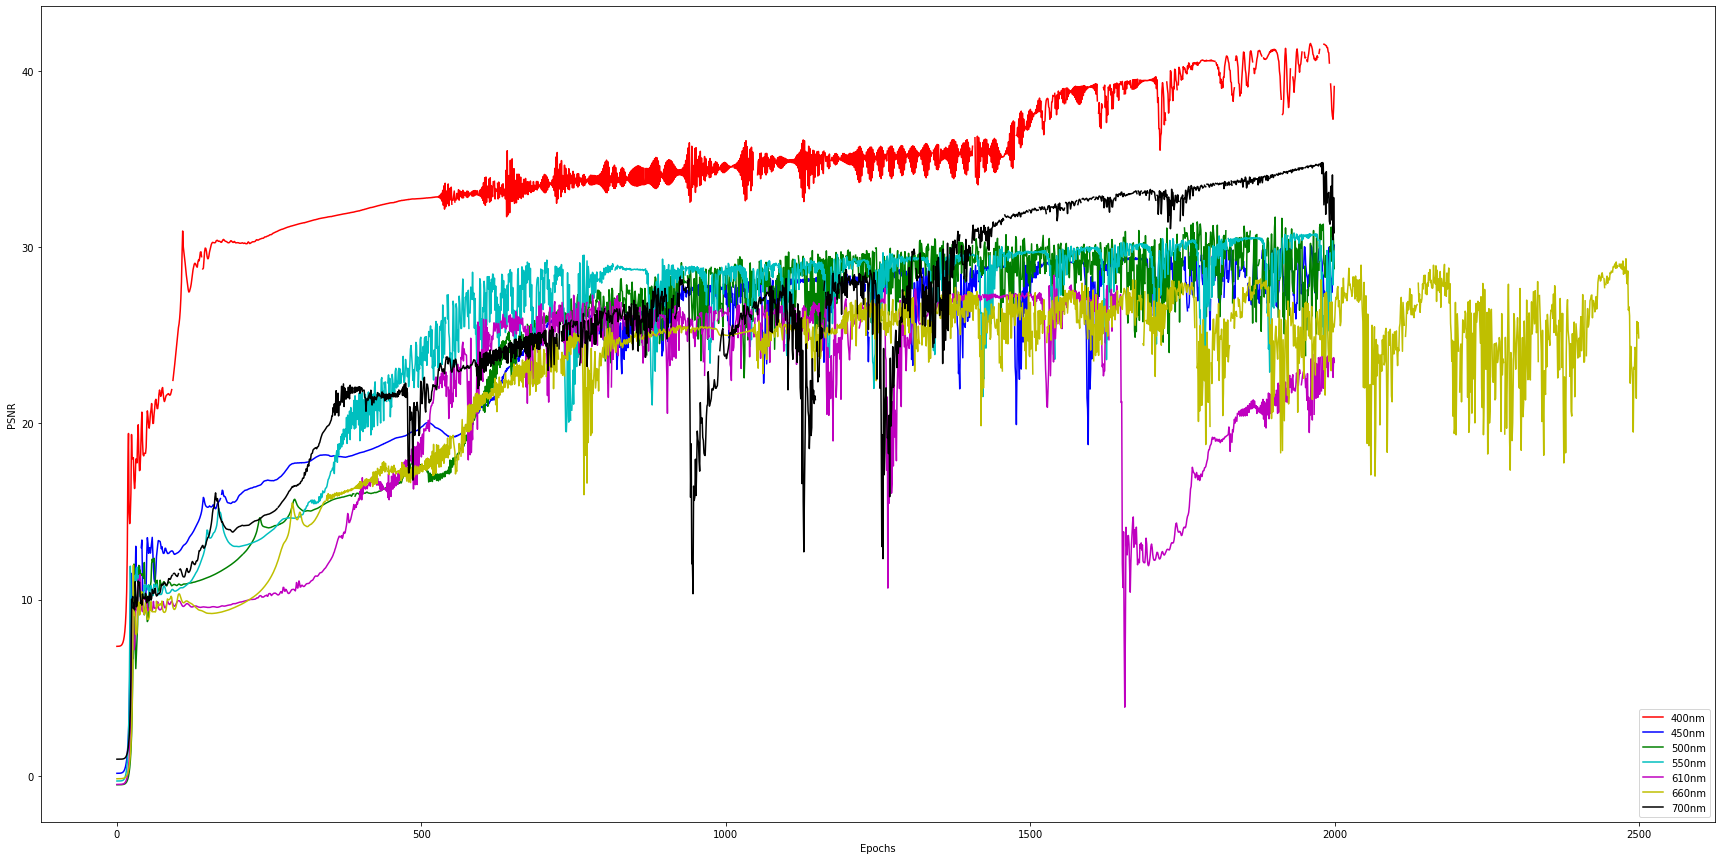

In [132]:
fig = plt.figure(figsize=(30, 15))
plt.xlabel("Epochs")
plt.ylabel("PSNR")
plt.plot(h1.history['PSNR'],color='r',label='400nm')
plt.plot(h2.history['PSNR'],color='b',label='450nm')
plt.plot(h3.history['PSNR'],color='g',label='500nm')
plt.plot(h4.history['PSNR'],color='c',label='550nm')
plt.plot(h5.history['PSNR'],color='m',label='610nm')
plt.plot(h6.history['PSNR'],color='y',label='660nm')
plt.plot(h7.history['PSNR'],color='k',label='700nm')
leg = plt.legend(loc='lower right')
plt.show()

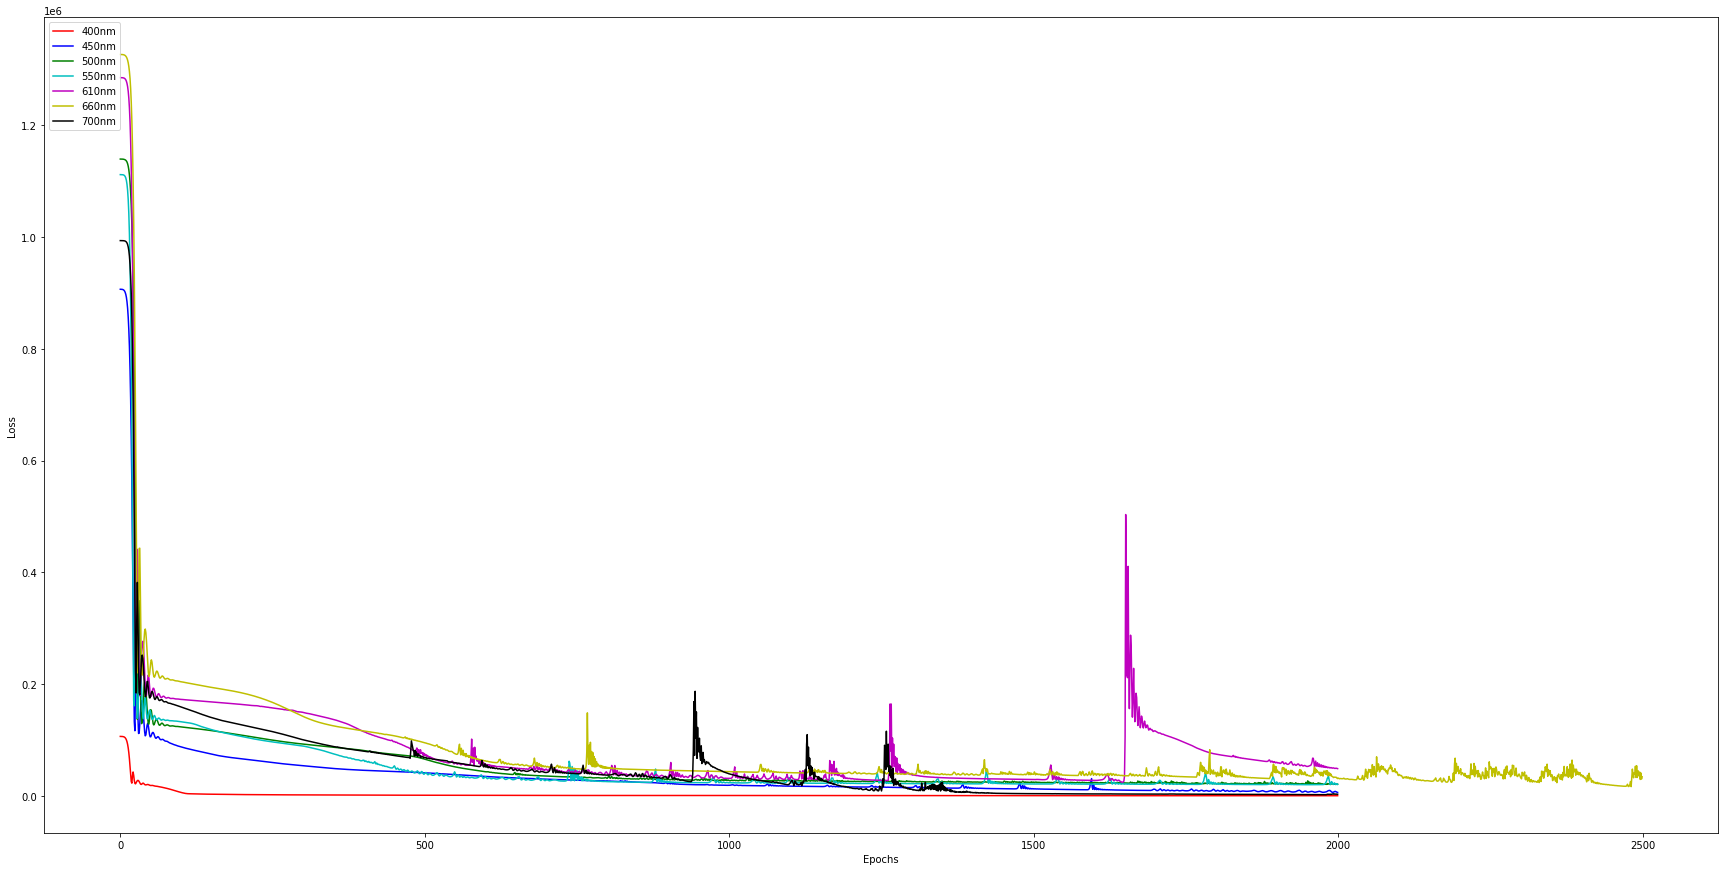

In [134]:
fig = plt.figure(figsize=(30, 15))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(h1.history['loss'],color='r',label='400nm')
plt.plot(h2.history['loss'],color='b',label='450nm')
plt.plot(h3.history['loss'],color='g',label='500nm')
plt.plot(h4.history['loss'],color='c',label='550nm')
plt.plot(h5.history['loss'],color='m',label='610nm')
plt.plot(h6.history['loss'],color='y',label='660nm')
plt.plot(h7.history['loss'],color='k',label='700nm')
leg = plt.legend(loc='upper left')
plt.show()

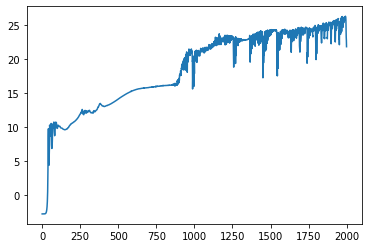

In [23]:
plt.plot(h2.history['PSNR'])
plt.show()

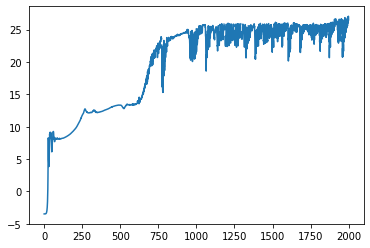

In [24]:
plt.plot(h3.history['PSNR'])
plt.show()

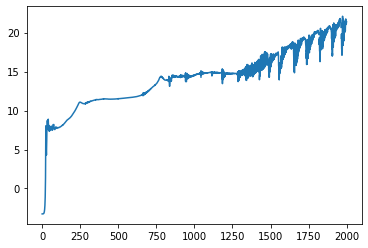

In [25]:
plt.plot(h4.history['PSNR'])
plt.show()

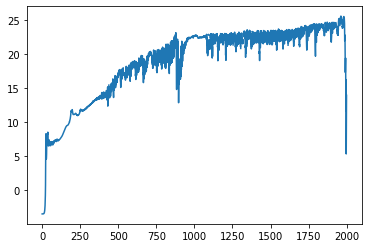

In [26]:
plt.plot(h5.history['PSNR'])
plt.show()

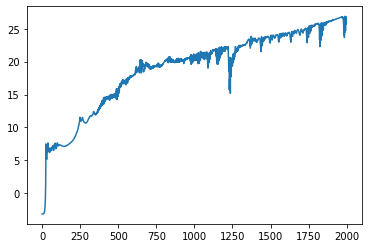

In [27]:
plt.plot(h6.history['PSNR'])
plt.show()

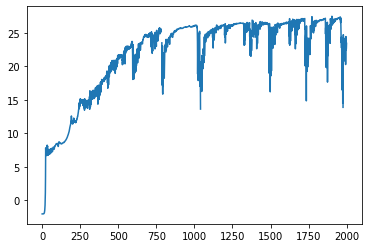

In [28]:
plt.plot(h7.history['PSNR'])
plt.show()

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

BATCH 1

In [3]:
test=mat73.loadmat('data (20).mat')['rgb']
print(test.shape)
test_rgb=[]
for i in range(64):
    test1=[]
    for j in range(64):
        test1.append([test[i][j][0],test[i][j][1],test[i][j][2]])
    
    test_rgb.append(test1)

test_rgb=np.array(test_rgb)
test_rgb.shape  

(1392, 1301, 3)


(64, 64, 3)

In [4]:
t=np.expand_dims(np.expand_dims(test_rgb,axis=0),axis=0)
# t*=500
t.shape

(1, 1, 64, 64, 3)

LOAD MODELS

In [7]:
b1= keras.models.load_model('band1.h5',custom_objects={"PSNR": PSNR})
b2= keras.models.load_model('band7.h5',custom_objects={"PSNR": PSNR})
b3= keras.models.load_model('band11.h5',custom_objects={"PSNR": PSNR})
b4= keras.models.load_model('band16.h5',custom_objects={"PSNR": PSNR})
b5= keras.models.load_model('band21.h5',custom_objects={"PSNR": PSNR})
b6= keras.models.load_model('band26.h5',custom_objects={"PSNR": PSNR})
b7= keras.models.load_model('band31.h5',custom_objects={"PSNR": PSNR})

PREDICT ALL 7 BANDS for DATA(8).mat

In [8]:
y1=b1.predict(t)
y2=b2.predict(t)
y3=b3.predict(t)
y4=b4.predict(t)
y5=b5.predict(t)
y6=b6.predict(t)
y7=b7.predict(t)

1/1 [==============================] - 0s 105ms/step


In [9]:
y1=np.squeeze(np.squeeze(y1, axis=0), axis=0)
y2=np.squeeze(np.squeeze(y2, axis=0), axis=0)
y3=np.squeeze(np.squeeze(y3, axis=0), axis=0)
y4=np.squeeze(np.squeeze(y4, axis=0), axis=0)
y5=np.squeeze(np.squeeze(y5, axis=0), axis=0)
y6=np.squeeze(np.squeeze(y6, axis=0), axis=0)
y7=np.squeeze(np.squeeze(y7, axis=0), axis=0)

y1.shape

(64, 64, 1)

FINAL PREDICTED

In [10]:
b1,b2,b3,b4,b5,b6,b7=[],[],[],[],[],[],[]
b1.append(y1[:, :, 0])
b2.append(y2[:, :, 0])
b3.append(y3[:, :, 0])
b4.append(y4[:, :, 0])
b5.append(y5[:, :, 0])
b6.append(y6[:, :, 0])
b7.append(y7[:, :, 0])


In [170]:
b1

[[194.125],
 [196.0],
 [196.125],
 [195.0],
 [193.875],
 [194.75],
 [195.75],
 [196.0],
 [198.5],
 [198.25],
 [198.25],
 [206.0],
 [217.375],
 [221.125],
 [208.0],
 [201.25],
 [197.625],
 [195.5],
 [194.625],
 [196.5],
 [197.0],
 [196.0],
 [195.875],
 [196.75],
 [200.125],
 [202.875],
 [199.375],
 [195.25],
 [196.0],
 [194.875],
 [195.25],
 [194.0],
 [196.5],
 [195.5],
 [196.75],
 [200.125],
 [204.0],
 [203.625],
 [200.625],
 [199.375],
 [199.625],
 [199.5],
 [202.375],
 [196.75],
 [198.0],
 [197.875],
 [195.5],
 [196.625],
 [195.5],
 [195.5],
 [194.125],
 [195.25],
 [195.625],
 [196.25],
 [194.75],
 [195.875],
 [194.75],
 [194.375],
 [195.0],
 [194.125],
 [194.375],
 [193.875],
 [195.25],
 [193.875]]

In [11]:
test_rgb_check=[]
test_rgb_check.append(test_rgb[:,:,0])
test_rgb_check

[array([[0.4      , 0.390625 , 0.4078125, ..., 0.3921875, 0.4078125,
         0.3640625],
        [0.4078125, 0.4390625, 0.40625  , ..., 0.4140625, 0.4140625,
         0.3796875],
        [0.4234375, 0.43125  , 0.4078125, ..., 0.3875   , 0.4125   ,
         0.4234375],
        ...,
        [0.45625  , 0.45     , 0.440625 , ..., 0.415625 , 0.4546875,
         0.4546875],
        [0.4140625, 0.415625 , 0.4296875, ..., 0.43125  , 0.4234375,
         0.415625 ],
        [0.4390625, 0.4390625, 0.4328125, ..., 0.43125  , 0.4375   ,
         0.4171875]])]

In [60]:
def test_band(m,n):    
    test_rad=mat73.loadmat(m)['rad']
    test_rad= np.rot90(test_rad, k=1, axes=(0, 1))

    print(test_rad.shape)
    test_band1=[]
    for i in range(64):
        test1=[]
        for j in range(64):
            test1.append([test_rad[i][j][n]])
        
        test_band1.append(test1)

    test_band1=np.array(test_band1)
    return test_band1

LOADING GROUND TRUTH

In [13]:
test_band_1=[]
test_band_2=[]
test_band_3=[]
test_band_4=[]
test_band_5=[]
test_band_6=[]
test_band_7=[]

test_band_1.append(test_band('data (8).mat',0)[:,:,0])
test_band_2.append(test_band('data (8).mat',6)[:,:,0])
test_band_3.append(test_band('data (8).mat',10)[:,:,0])
test_band_4.append(test_band('data (8).mat',15)[:,:,0])
test_band_5.append(test_band('data (8).mat',20)[:,:,0])
test_band_6.append(test_band('data (8).mat',25)[:,:,0])
test_band_7.append(test_band('data (8).mat',30)[:,:,0])


(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)


VISUALISING THE RESULTS

In [18]:
def plot_results(test_rgb_check, test_bands, result,n):
    fig = plt.figure(figsize=(20, 20))
    fig.add_subplot(1, 3, 1)
    plt.title("BAND "+str(n))
    plt.imshow(test_rgb_check[0])
    plt.axis('off')
    plt.title("RGB image")

    fig.add_subplot(1, 3, 2)
    plt.imshow(test_bands[0])
    plt.axis('off')
    plt.title("GT band")

    fig.add_subplot(1, 3, 3)
    plt.imshow(result[0])
    plt.axis('off')
    plt.title("Pred. band")

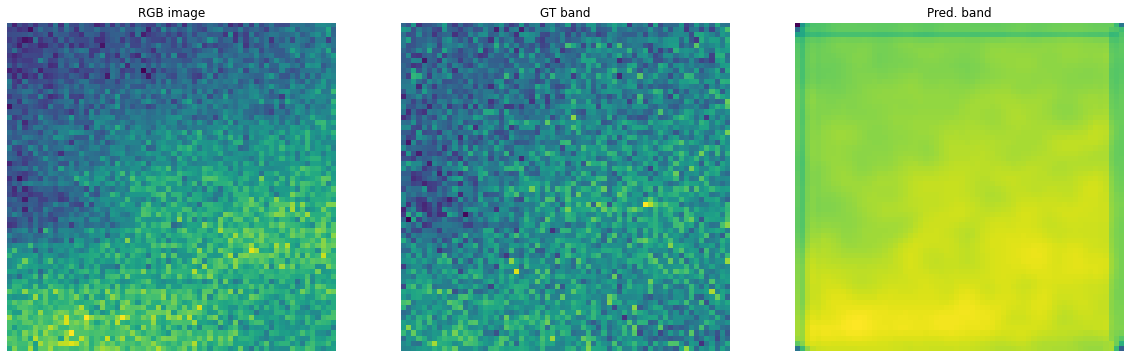

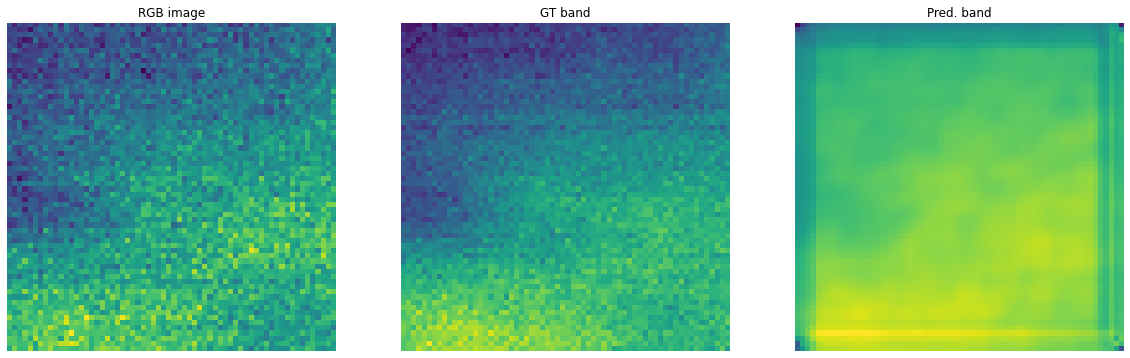

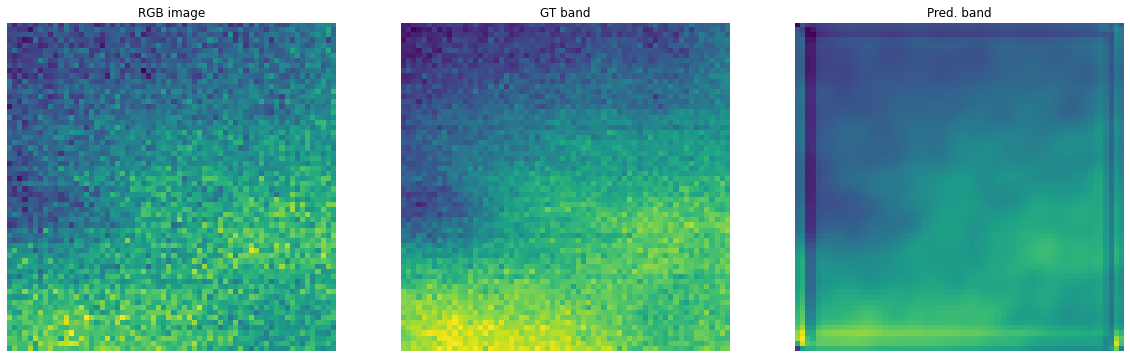

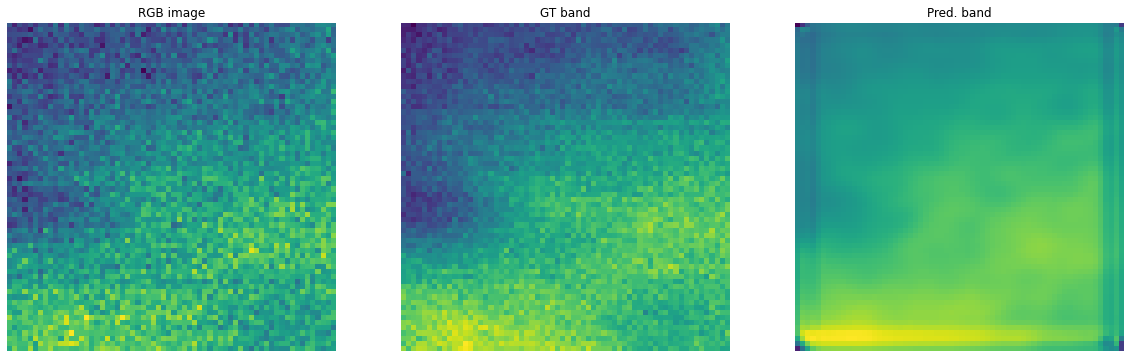

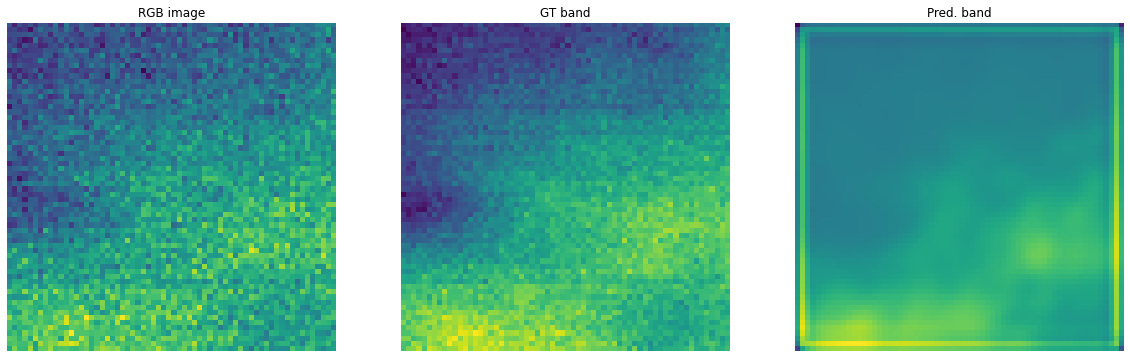

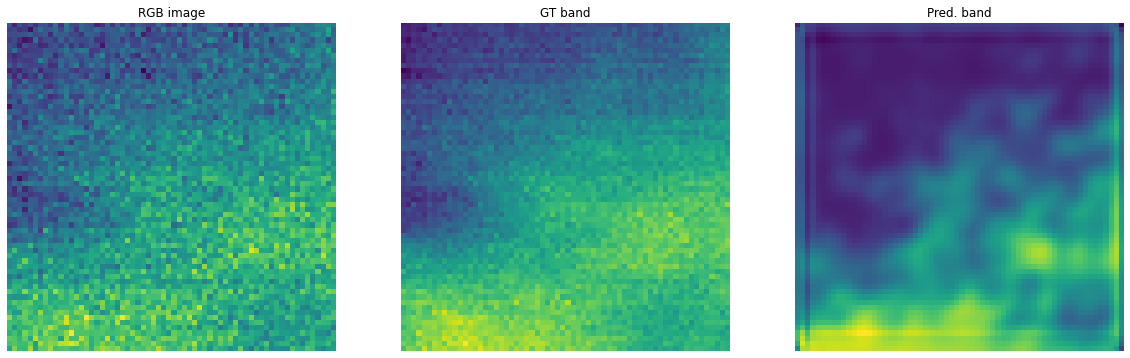

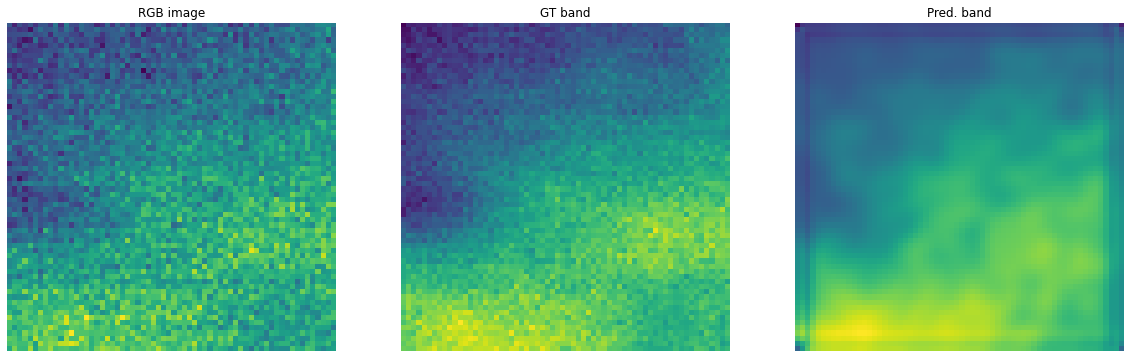

In [67]:
plot_results(test_rgb_check, test_band_1, b1,0)
plot_results(test_rgb_check, test_band_2, b2,0)
plot_results(test_rgb_check, test_band_3, b3,0)
plot_results(test_rgb_check, test_band_4, b4,0)
plot_results(test_rgb_check, test_band_5, b5,0)
plot_results(test_rgb_check, test_band_6, b6,0)
plot_results(test_rgb_check, test_band_7, b7,0)

BAND 1 PSNR graph

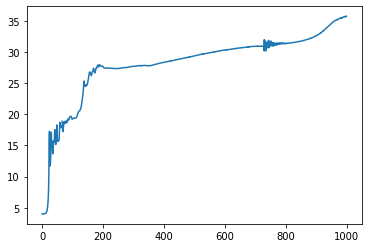

In [42]:
plt.plot(h1.history['PSNR'])
plt.show()

BAND 2 PSNR graph

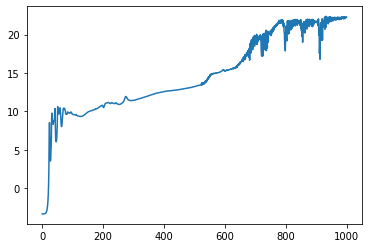

In [43]:
plt.plot(h2.history['PSNR'])
plt.show()

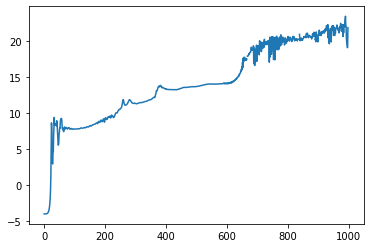

In [44]:
plt.plot(h3.history['PSNR'])
plt.show()

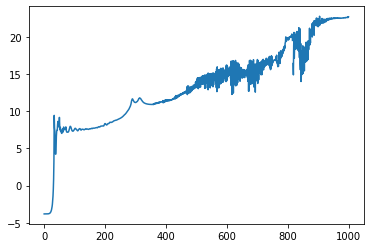

In [45]:
plt.plot(h4.history['PSNR'])
plt.show()

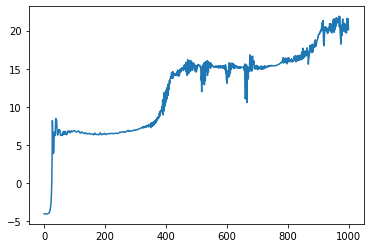

In [46]:
plt.plot(h5.history['PSNR'])
plt.show()

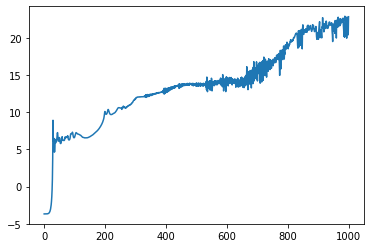

In [47]:
plt.plot(h6.history['PSNR'])
plt.show()

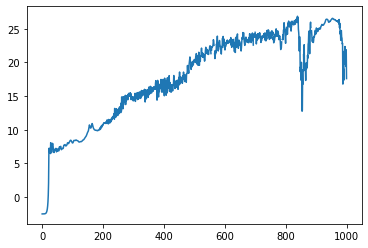

In [48]:
plt.plot(h7.history['PSNR'])
plt.show()

}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}]

BATCH 3

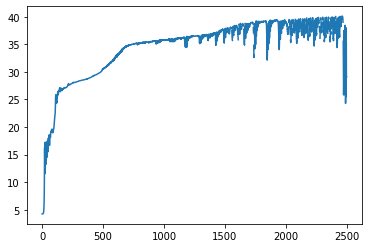

In [101]:
plt.plot(h1.history['PSNR'])
plt.show()

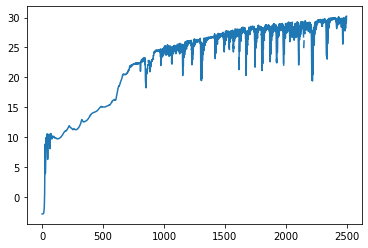

In [102]:
plt.plot(h2.history['PSNR'])
plt.show()

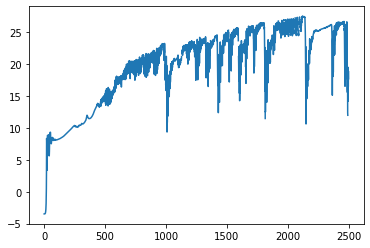

In [103]:
plt.plot(h3.history['PSNR'])
plt.show()

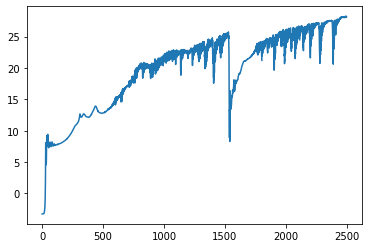

In [104]:
plt.plot(h4.history['PSNR'])
plt.show()

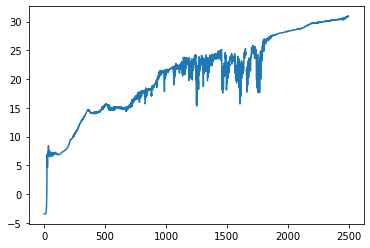

In [105]:
plt.plot(h5.history['PSNR'])
plt.show()

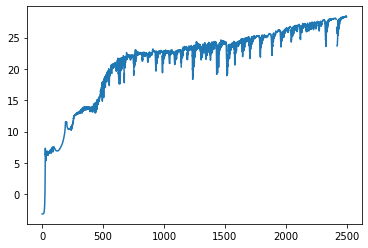

In [106]:
plt.plot(h6.history['PSNR'])
plt.show()

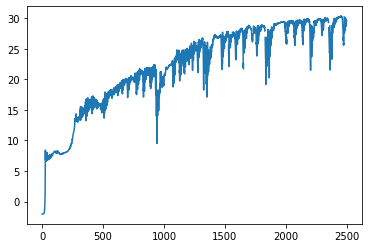

In [107]:
plt.plot(h7.history['PSNR'])
plt.show()

In [175]:
test=mat73.loadmat('data (22).mat')['rgb']
print(test.shape)
test_rgb=[]
for i in range(64):
    test1=[]
    for j in range(64):
        test1.append([test[i][j][0],test[i][j][1],test[i][j][2]])
    
    test_rgb.append(test1)

test_rgb=np.array(test_rgb)
test_rgb.shape  

(1392, 1303, 3)


(64, 64, 3)

In [176]:
t=np.expand_dims(np.expand_dims(test_rgb,axis=0),axis=0)
# t*=500
t.shape

(1, 1, 64, 64, 3)

In [154]:
b1= keras.models.load_model('batch3/band1.h5',custom_objects={"PSNR": PSNR})
b2= keras.models.load_model('batch3/band7.h5',custom_objects={"PSNR": PSNR})
b3= keras.models.load_model('batch3/band11.h5',custom_objects={"PSNR": PSNR})
b4= keras.models.load_model('batch3/band16.h5',custom_objects={"PSNR": PSNR})
b5= keras.models.load_model('batch3/band21.h5',custom_objects={"PSNR": PSNR})
b6= keras.models.load_model('batch3/band26.h5',custom_objects={"PSNR": PSNR})
b7= keras.models.load_model('batch3/band31.h5',custom_objects={"PSNR": PSNR})

In [155]:
y1=b1.predict(t)
y2=b2.predict(t)
y3=b3.predict(t)
y4=b4.predict(t)
y5=b5.predict(t)
y6=b6.predict(t)
y7=b7.predict(t)

1/1 [==============================] - 0s 199ms/step


In [156]:
y1=np.squeeze(np.squeeze(y1, axis=0), axis=0)
y2=np.squeeze(np.squeeze(y2, axis=0), axis=0)
y3=np.squeeze(np.squeeze(y3, axis=0), axis=0)
y4=np.squeeze(np.squeeze(y4, axis=0), axis=0)
y5=np.squeeze(np.squeeze(y5, axis=0), axis=0)
y6=np.squeeze(np.squeeze(y6, axis=0), axis=0)
y7=np.squeeze(np.squeeze(y7, axis=0), axis=0)

In [157]:
b1,b2,b3,b4,b5,b6,b7=[],[],[],[],[],[],[]
b1.append(y1[:, :, 0])
b2.append(y2[:, :, 0])
b3.append(y3[:, :, 0])
b4.append(y4[:, :, 0])
b5.append(y5[:, :, 0])
b6.append(y6[:, :, 0])
b7.append(y7[:, :, 0])

In [ ]:
b1

In [158]:
test_rgb_check=[]
test_rgb_check.append(test_rgb[:,:,0])
test_rgb_check

[array([[0.76696165, 0.72861357, 0.76106195, ..., 0.81120944, 0.80530973,
         0.7979351 ],
        [0.74926254, 0.75516224, 0.73893805, ..., 0.7979351 , 0.83480826,
         0.77581121],
        [0.75811209, 0.75958702, 0.76106195, ..., 0.78908555, 0.82743363,
         0.77876106],
        ...,
        [0.86578171, 0.86283186, 0.84660767, ..., 0.82448378, 0.83923304,
         0.84513274],
        [0.85693215, 0.86283186, 0.8539823 , ..., 0.83923304, 0.8539823 ,
         0.82448378],
        [0.83775811, 0.87758112, 0.85103245, ..., 0.80678466, 0.82448378,
         0.82890855]])]

In [159]:
test_band_1=[]
test_band_2=[]
test_band_3=[]
test_band_4=[]
test_band_5=[]
test_band_6=[]
test_band_7=[]

test_band_1.append(test_band('data (8).mat',0)[:,:,0])
test_band_2.append(test_band('data (8).mat',6)[:,:,0])
test_band_3.append(test_band('data (8).mat',10)[:,:,0])
test_band_4.append(test_band('data (8).mat',15)[:,:,0])
test_band_5.append(test_band('data (8).mat',20)[:,:,0])
test_band_6.append(test_band('data (8).mat',25)[:,:,0])
test_band_7.append(test_band('data (8).mat',30)[:,:,0])


(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)
(1392, 1300, 31)


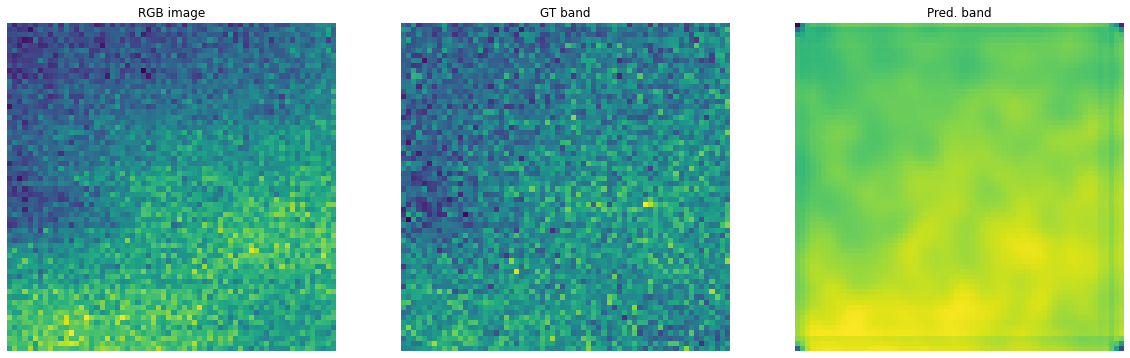

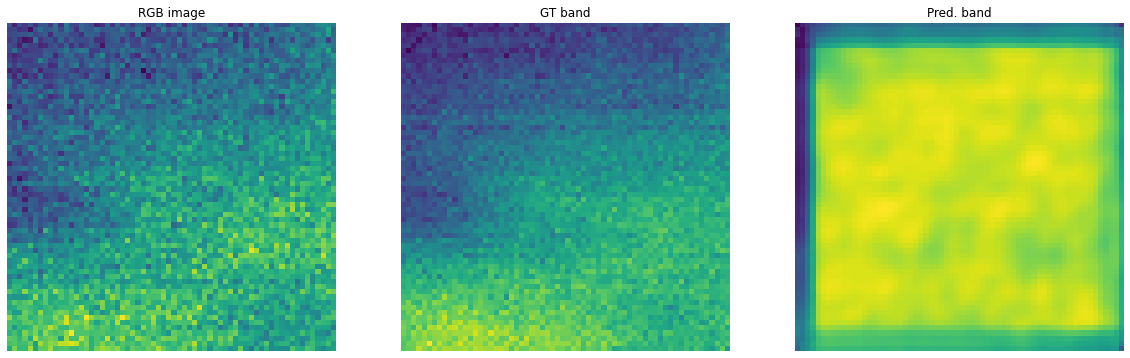

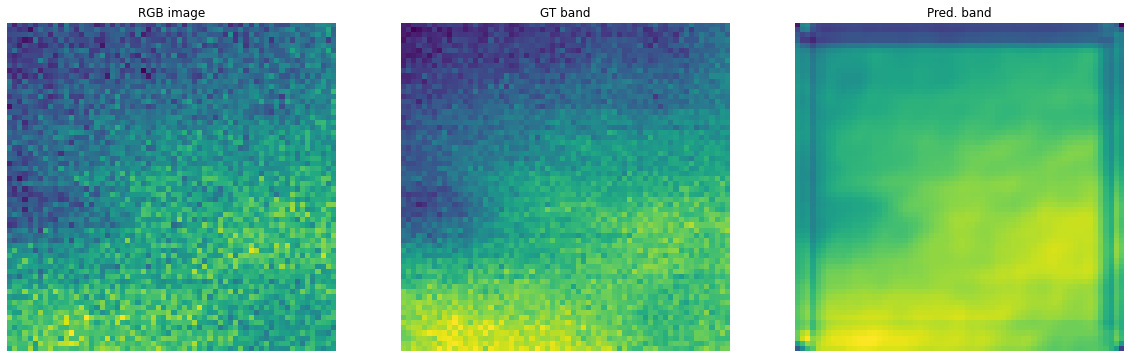

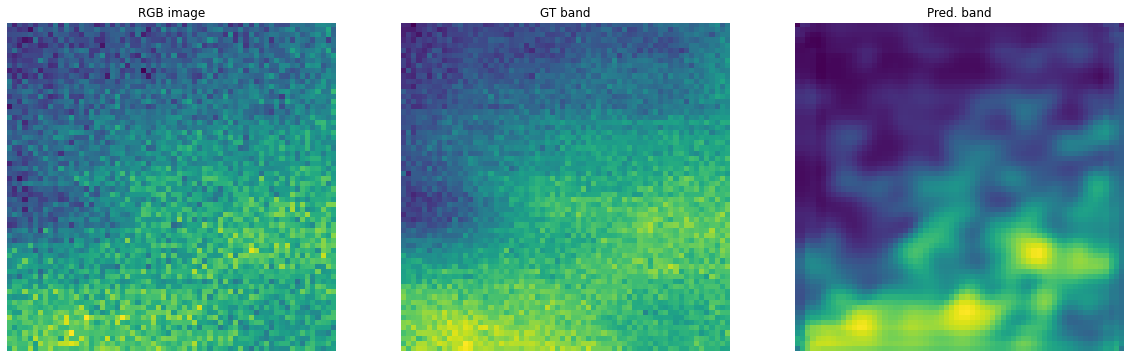

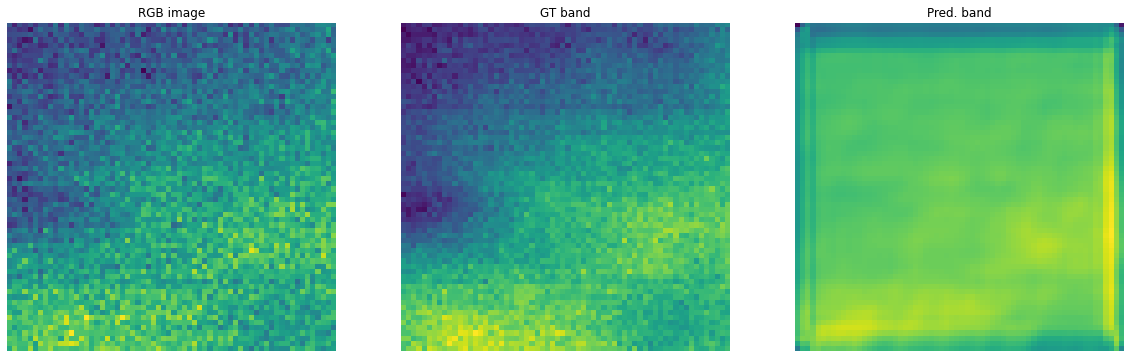

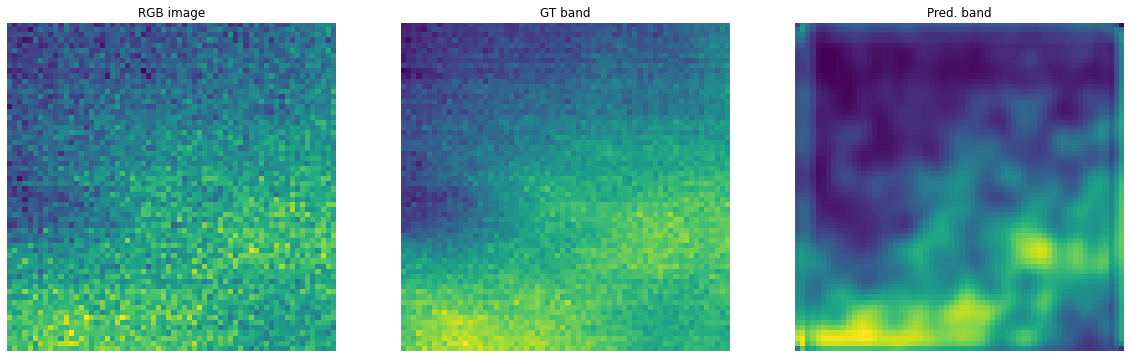

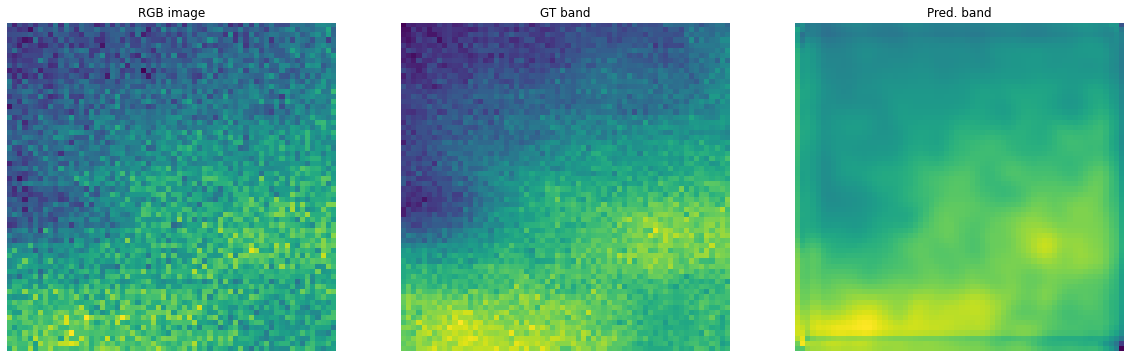

In [160]:
plot_results(test_rgb_check, test_band_1, b1,0)
plot_results(test_rgb_check, test_band_2, b2,0)
plot_results(test_rgb_check, test_band_3, b3,0)
plot_results(test_rgb_check, test_band_4, b4,0)
plot_results(test_rgb_check, test_band_5, b5,0)
plot_results(test_rgb_check, test_band_6, b6,0)
plot_results(test_rgb_check, test_band_7, b7,0)